## 4.1 선형 회귀

In [1]:
import numpy as np

X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

In [2]:
X_b = np.c_[np.ones((100, 1)), X]  # 모든 샘플에 x0 = 1을 추가합니다.
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

In [3]:
X[0:5]

array([[1.10791734],
       [1.34677428],
       [0.50128304],
       [1.00475364],
       [1.25464768]])

In [4]:
X_b[0:5]

array([[1.        , 1.10791734],
       [1.        , 1.34677428],
       [1.        , 0.50128304],
       [1.        , 1.00475364],
       [1.        , 1.25464768]])

In [5]:
theta_best

array([[3.96374286],
       [3.12604879]])

In [6]:
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new]  # 모든 샘플에 x0 = 1을 추가합니다.
y_predict = X_new_b.dot(theta_best)
y_predict

array([[ 3.96374286],
       [10.21584044]])

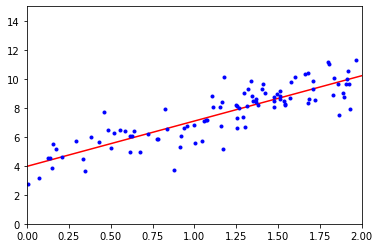

In [7]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

plt.plot(X_new, y_predict, "r-")
plt.plot(X, y, "b.")
plt.axis([0, 2, 0, 15])
plt.show()

In [8]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_

(array([3.96374286]), array([[3.12604879]]))

In [9]:
lin_reg.predict(X_new)

array([[ 3.96374286],
       [10.21584044]])

In [10]:
theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_b, y, rcond=1e-6)
# LinearRegression 클래스는 scipy.linalg.lstsq() 함수("least squares"의 약자)를 사용하므로 이 함수를 직접 사용할 수 있습니다
theta_best_svd

array([[3.96374286],
       [3.12604879]])

In [11]:
np.linalg.pinv(X_b).dot(y)

array([[3.96374286],
       [3.12604879]])

## 4.2 경사 하강법

### 4.2.1 배치 경사 하강법

In [12]:
eta = 0.1  # 학습률
n_iterations = 1000
m = 100

theta = np.random.randn(2,1)  # 무작위 초기화

for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients

In [13]:
theta  # 정규방정식으로 찾은 것과 결과가 같음

array([[3.96374285],
       [3.12604879]])

### 4.2.2 확률적 경사 하강법

In [14]:
n_epochs = 50
t0, t1 = 5, 50  # 학습 스케줄 하이퍼파라미터
m = 100

def learning_schedule(t):
    return t0 / (t + t1)

theta = np.random.randn(2,1)  # 랜덤 초기화

for epoch in range(n_epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta * gradients           

In [15]:
theta

array([[3.98790189],
       [3.08319014]])

In [16]:
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3, penalty=None, eta0=0.1, random_state=42)
sgd_reg.fit(X, y.ravel())

SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.1, fit_intercept=True, l1_ratio=0.15,
             learning_rate='invscaling', loss='squared_loss', max_iter=1000,
             n_iter_no_change=5, penalty=None, power_t=0.25, random_state=42,
             shuffle=True, tol=0.001, validation_fraction=0.1, verbose=0,
             warm_start=False)

In [17]:
sgd_reg.intercept_, sgd_reg.coef_

(array([3.93510739]), array([3.08154967]))